In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df. describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
df.shape

(918, 12)

In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

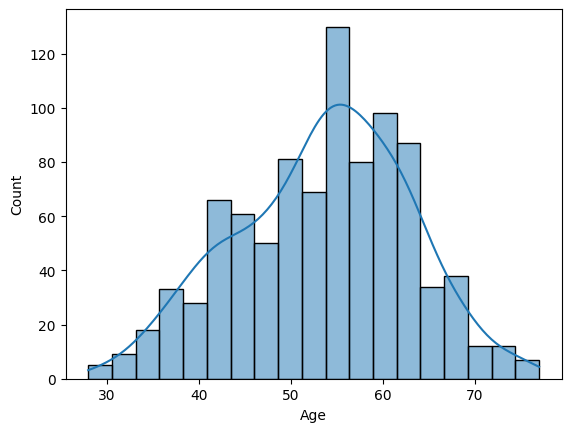

In [7]:
sns.histplot(data=df, x="Age", kde=True)


<Axes: xlabel='RestingBP', ylabel='Count'>

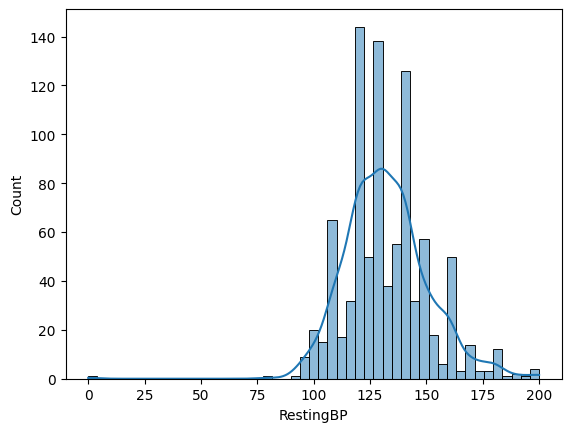

In [8]:
sns.histplot(data=df, x="RestingBP", kde=True)


<Axes: xlabel='Cholesterol', ylabel='Count'>

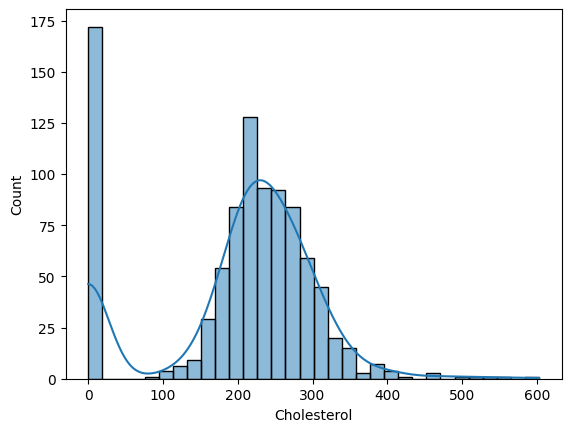

In [9]:
sns.histplot(data=df, x="Cholesterol", kde=True)

<Axes: xlabel='FastingBS', ylabel='Count'>

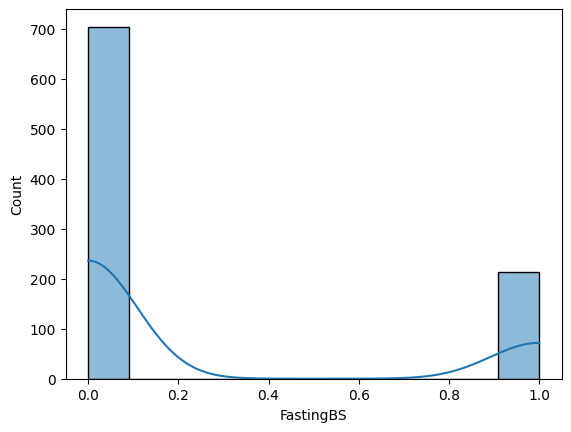

In [10]:
sns.histplot(data=df, x="FastingBS", kde=True)

<Axes: xlabel='MaxHR', ylabel='Count'>

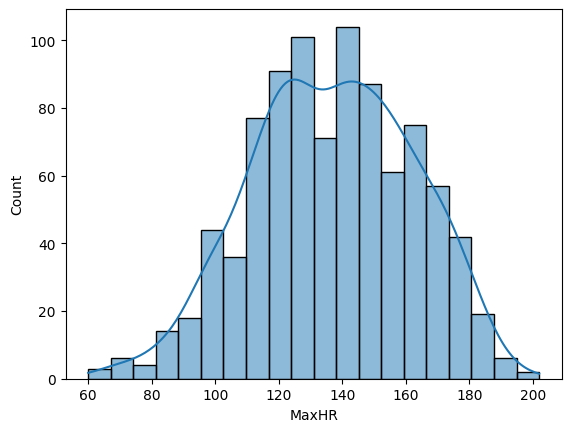

In [11]:
sns.histplot(data=df, x="MaxHR", kde=True)

<Axes: xlabel='Oldpeak', ylabel='Count'>

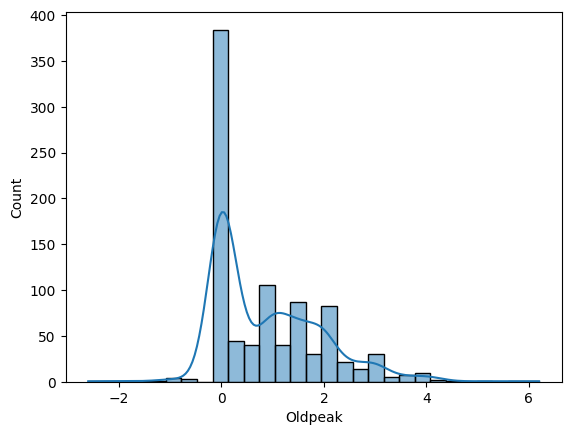

In [12]:
sns.histplot(data=df, x="Oldpeak", kde=True)

In [13]:
columns_to_remove_outliers = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

In [14]:
for column in columns_to_remove_outliers:
        mean = df[column].mean()
        std = df[column].std()
        median = df[column].median()
        MAD = np.median((np.abs(df[column]-median)))
        
        def get_zscore(value):
                z_score = (value - mean) / std
                #z_score = 0.6745 * (value - median) / MAD
                return z_score
        df[f"{column}_z_score"] = df[column].apply(get_zscore)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_z_score,RestingBP_z_score,Cholesterol_z_score,MaxHR_z_score,Oldpeak_z_score
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,-1.432359,0.410685,0.824621,1.382175,-0.831979
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.478223,1.490940,-0.171867,0.753746,0.105606
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-1.750404,-0.129442,0.769768,-1.524307,-0.831979
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,-0.584238,0.302660,0.138964,-1.131539,0.574398
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.051853,0.950812,-0.034736,-0.581664,-0.831979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,-0.902283,-1.209697,0.596068,-0.188897,0.293123
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,1.536064,0.626736,-0.053020,0.164595,2.355810
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0.369898,-0.129442,-0.619830,-0.856602,0.293123
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0.369898,-0.129442,0.340090,1.460728,-0.831979


In [15]:
# df = df[(df.Age_z_score < 3.5)]
# df = df[(df.RestingBP_z_score < 3.5)]
# df = df[(df.Cholesterol_z_score < 3.5)]
# df = df[(df.MaxHR_z_score < 3.5)]
# df = df[(df.Oldpeak_z_score < 3.5)]
# df

In [16]:
df = df[(df.Age_z_score > -3 ) & (df.Age_z_score < 3)]
df = df[(df.RestingBP_z_score > -3 ) & (df.RestingBP_z_score < 3)]
df = df[(df.Cholesterol_z_score > -3 ) & (df.Cholesterol_z_score < 3)]
df = df[(df.MaxHR_z_score > -3 ) & (df.MaxHR_z_score < 3)]
df = df[(df.Oldpeak_z_score > -3 ) & (df.Oldpeak_z_score < 3)]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_z_score,RestingBP_z_score,Cholesterol_z_score,MaxHR_z_score,Oldpeak_z_score
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,-1.432359,0.410685,0.824621,1.382175,-0.831979
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.478223,1.490940,-0.171867,0.753746,0.105606
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-1.750404,-0.129442,0.769768,-1.524307,-0.831979
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,-0.584238,0.302660,0.138964,-1.131539,0.574398
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.051853,0.950812,-0.034736,-0.581664,-0.831979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,-0.902283,-1.209697,0.596068,-0.188897,0.293123
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,1.536064,0.626736,-0.053020,0.164595,2.355810
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0.369898,-0.129442,-0.619830,-0.856602,0.293123
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0.369898,-0.129442,0.340090,1.460728,-0.831979


<Axes: xlabel='RestingBP', ylabel='Count'>

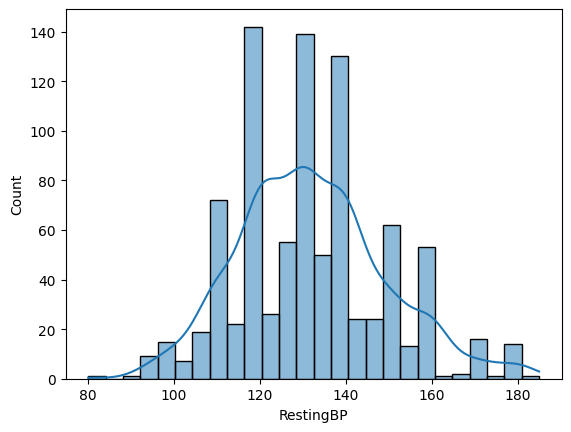

In [17]:
sns.histplot(data=df, x="RestingBP", kde=True)


<Axes: xlabel='Cholesterol', ylabel='Count'>

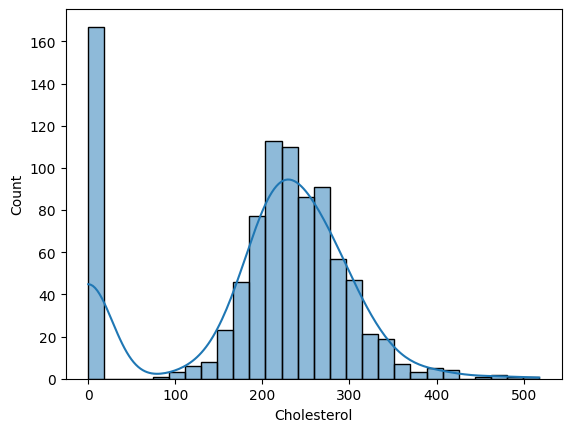

In [18]:
sns.histplot(data=df, x="Cholesterol", kde=True)

<Axes: xlabel='MaxHR', ylabel='Count'>

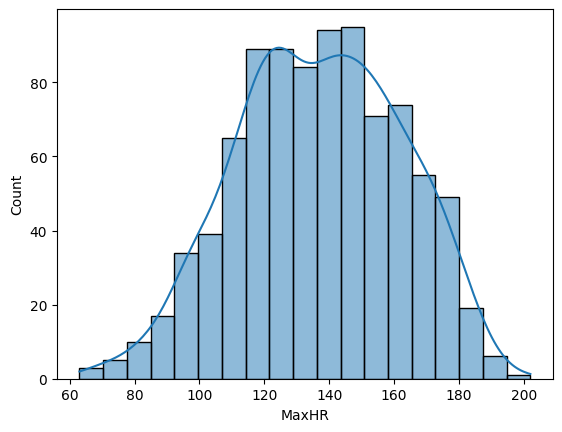

In [19]:
sns.histplot(data=df, x="MaxHR", kde=True)

<Axes: xlabel='Oldpeak', ylabel='Count'>

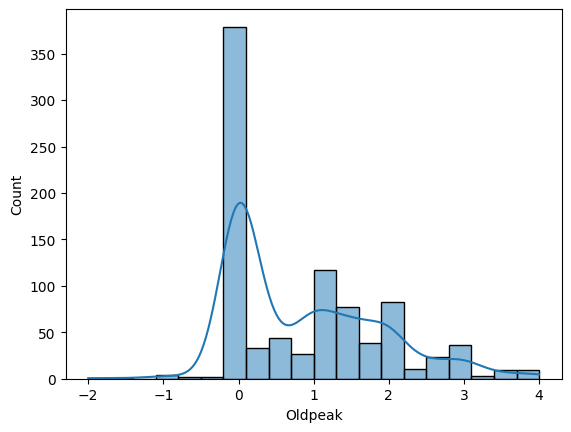

In [20]:
sns.histplot(data=df, x="Oldpeak", kde=True)

In [21]:
df.drop(["Age_z_score", "RestingBP_z_score", "Cholesterol_z_score", "MaxHR_z_score", "Oldpeak_z_score"], axis=1, inplace=True)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [22]:
df = pd.get_dummies(df, drop_first=True)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [23]:
X = df.drop("HeartDisease", axis=1)
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,False,True,False,False,False,False,False,True,False


In [24]:
y = df.HeartDisease
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 899, dtype: int64

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42815446,  0.46590022,  0.84963584, ..., -0.8229452 ,
        -0.99888827,  1.13469459],
       [-0.47585532,  1.63471366, -0.16812204, ..., -0.8229452 ,
         1.00111297, -0.88129441],
       [-1.7455875 , -0.1185065 ,  0.79361247, ..., -0.8229452 ,
        -0.99888827,  1.13469459],
       ...,
       [ 0.3706328 , -0.1185065 , -0.62564622, ...,  1.21514774,
         1.00111297, -0.88129441],
       [ 0.3706328 , -0.1185065 ,  0.35476274, ..., -0.8229452 ,
         1.00111297, -0.88129441],
       [-1.63977649,  0.34901888, -0.21480818, ..., -0.8229452 ,
        -0.99888827,  1.13469459]], shape=(899, 15))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42)

In [27]:
len(X_train)

719

In [28]:
len(X_test)

180

In [31]:
y.value_counts()

HeartDisease
1    492
0    407
Name: count, dtype: int64

In [67]:
svm = SVC()
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.8888888888888888

In [68]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVC(), X, y, cv=5)
scores.mean()

np.float64(0.6895779019242706)

In [71]:
from sklearn.ensemble import BaggingClassifier

svm_bag = BaggingClassifier(
        estimator=SVC(),
        n_estimators=100,
        max_samples=80,
        oob_score=True,
        random_state=0
)
# svm_bag.fit(X_train,y_train)
# svm_bag.score(X_test,y_test)
scores = cross_val_score(svm_bag,X,y, cv=5)
scores.mean()

np.float64(0.5660955927995033)

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
scores = cross_val_score(DecisionTreeClassifier(random_state=0),X,y,cv=5)
scores.mean()


np.float64(0.7284978274363749)

In [80]:
dt_bag = BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=0),
        n_estimators=100,
        max_samples=80,
        oob_score=True,
        random_state=0
)

scores = cross_val_score(dt_bag,X,y, cv=5)
scores.mean()

np.float64(0.8141030415890752)

In [84]:
dt_bag = BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=0),
        n_estimators=100,
        max_samples=80,
        oob_score=True,
        random_state=0
)

dt_bag.fit(X_train,y_train)
dt_bag.score(X_test, y_test)

0.8833333333333333

In [85]:
dt_bag.oob_score_

0.8595271210013908

In [88]:
rf_model = RandomForestClassifier()
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
scores.mean()

np.float64(0.8174922408441961)